# Traffic Sign Classification

This project aims to analyze images of Traffic Signs and identify the behavior that the driver has to follow according to them.

There are a total of 43 possible classes. The data was previously splitted between train: test and validation. Each one was stored in a pickle file: which has the following data:

- Coords: The coordinates of the location of the traffic sign;

- Labels: The target of the 43 classes;

- Features: The image in an array format: divided by the three color layers in a 256 RGB;

- Sizes: The size of the traffic sign, in pixels. This is not the size of the image, only of the traffic sign inside the image, to allow the creation of a borderline on the sign. 

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

## Defining the functions

In [2]:
def get_label_text(int_label):
    dict_labels = {0: 'Speed limit 20km/h', 1: 'Speed limit 30km/h', 2: 'Speed limit 50km/h',  3: 'Speed limit 60km/h',
4: 'Speed limit 70km/h',  5: 'Speed limit 80km/h', 6: 'End of speed limit 80km/h',  7: 'Speed limit 100km/h', 
8: 'Speed limit 120km/h',  9: 'No passing', 10: 'No passing if over 3.5 tons', 11: 'Right-of-way at next intersection', 
12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 tons prohibited', 
17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 
21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 
26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow',
31: 'Wild animals crossing', 32: 'End of speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 
35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left', 
40: 'Roundabout mandatory', 41: 'End of no passing', 42: 'End of no passing over 3.5 tons'}
    return dict_labels[int_label]

## Importing the datasets

In [3]:
with open('../Data/train.p', 'rb') as file:
    dict_train = pickle.load(file)

with open('../Data/test.p', 'rb') as file:
    dict_test = pickle.load(file)

with open('../Data/valid.p', 'rb') as file:
    dict_validation = pickle.load(file)

In [4]:
x_train, y_train = dict_train['features'], dict_train['labels']
x_test, y_test = dict_test['features'], dict_test['labels']
x_validation, y_validation = dict_validation['features'], dict_validation['labels']

## Creating the grayscale and normalized images

In [5]:
x_train_gray = np.sum(x_train/3, axis = 3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims=True)

In [6]:
x_train_gray_norm = (x_train_gray-128)/128
x_test_gray_norm = (x_test_gray-128)/128
x_validation_gray_norm = (x_validation_gray-128)/128

## Creating the convolutional layer

In [7]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation= 'relu'))

cnn_model.add(Dense(units = 84, activation= 'relu'))

cnn_model.add(Dense(units = 43, activation= 'softmax'))

cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])

history = cnn_model.fit(x_train_gray_norm, y_train, batch_size=500, epochs=20, verbose=1, validation_data=(x_validation_gray_norm, y_validation))

cnn_model.save('../Models/TSignClass.keras')

Epoch 1/20
70/70 [==============================] - 9s 116ms/step - loss: 3.1468 - accuracy: 0.1851 - val_loss: 2.6533 - val_accuracy: 0.3068
Epoch 2/20
70/70 [==============================] - 8s 112ms/step - loss: 1.6390 - accuracy: 0.5404 - val_loss: 1.4200 - val_accuracy: 0.5880
Epoch 3/20
70/70 [==============================] - 8s 113ms/step - loss: 0.9531 - accuracy: 0.7241 - val_loss: 1.0567 - val_accuracy: 0.6925
Epoch 4/20
70/70 [==============================] - 8s 115ms/step - loss: 0.6856 - accuracy: 0.8098 - val_loss: 0.8704 - val_accuracy: 0.7417
Epoch 5/20
70/70 [==============================] - 8s 114ms/step - loss: 0.5635 - accuracy: 0.8419 - val_loss: 0.8048 - val_accuracy: 0.7712
Epoch 6/20
70/70 [==============================] - 8s 116ms/step - loss: 0.4644 - accuracy: 0.8740 - val_loss: 0.7129 - val_accuracy: 0.7918
Epoch 7/20
70/70 [==============================] - 8s 120ms/step - loss: 0.3982 - accuracy: 0.8926 - val_loss: 0.6997 - val_accuracy: 0.8009
Epoch 

In [8]:
score = cnn_model.evaluate(x_test_gray_norm, y_test)

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

395/395 [==============================] - 2s 4ms/step - loss: 1.0780 - accuracy: 0.8300


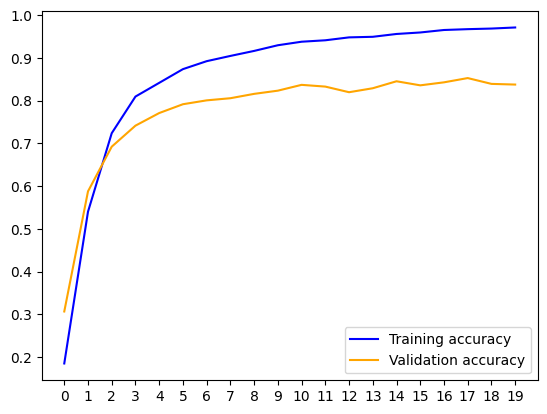

In [9]:
plt.plot(epochs, acc, '-', color = 'blue', label = 'Training accuracy')
plt.plot(epochs, val_acc, color = 'orange', label = 'Validation accuracy')
plt.xticks(range(20))
plt.legend()
plt.show()

395/395 [==============================] - 2s 4ms/step


<Axes: >

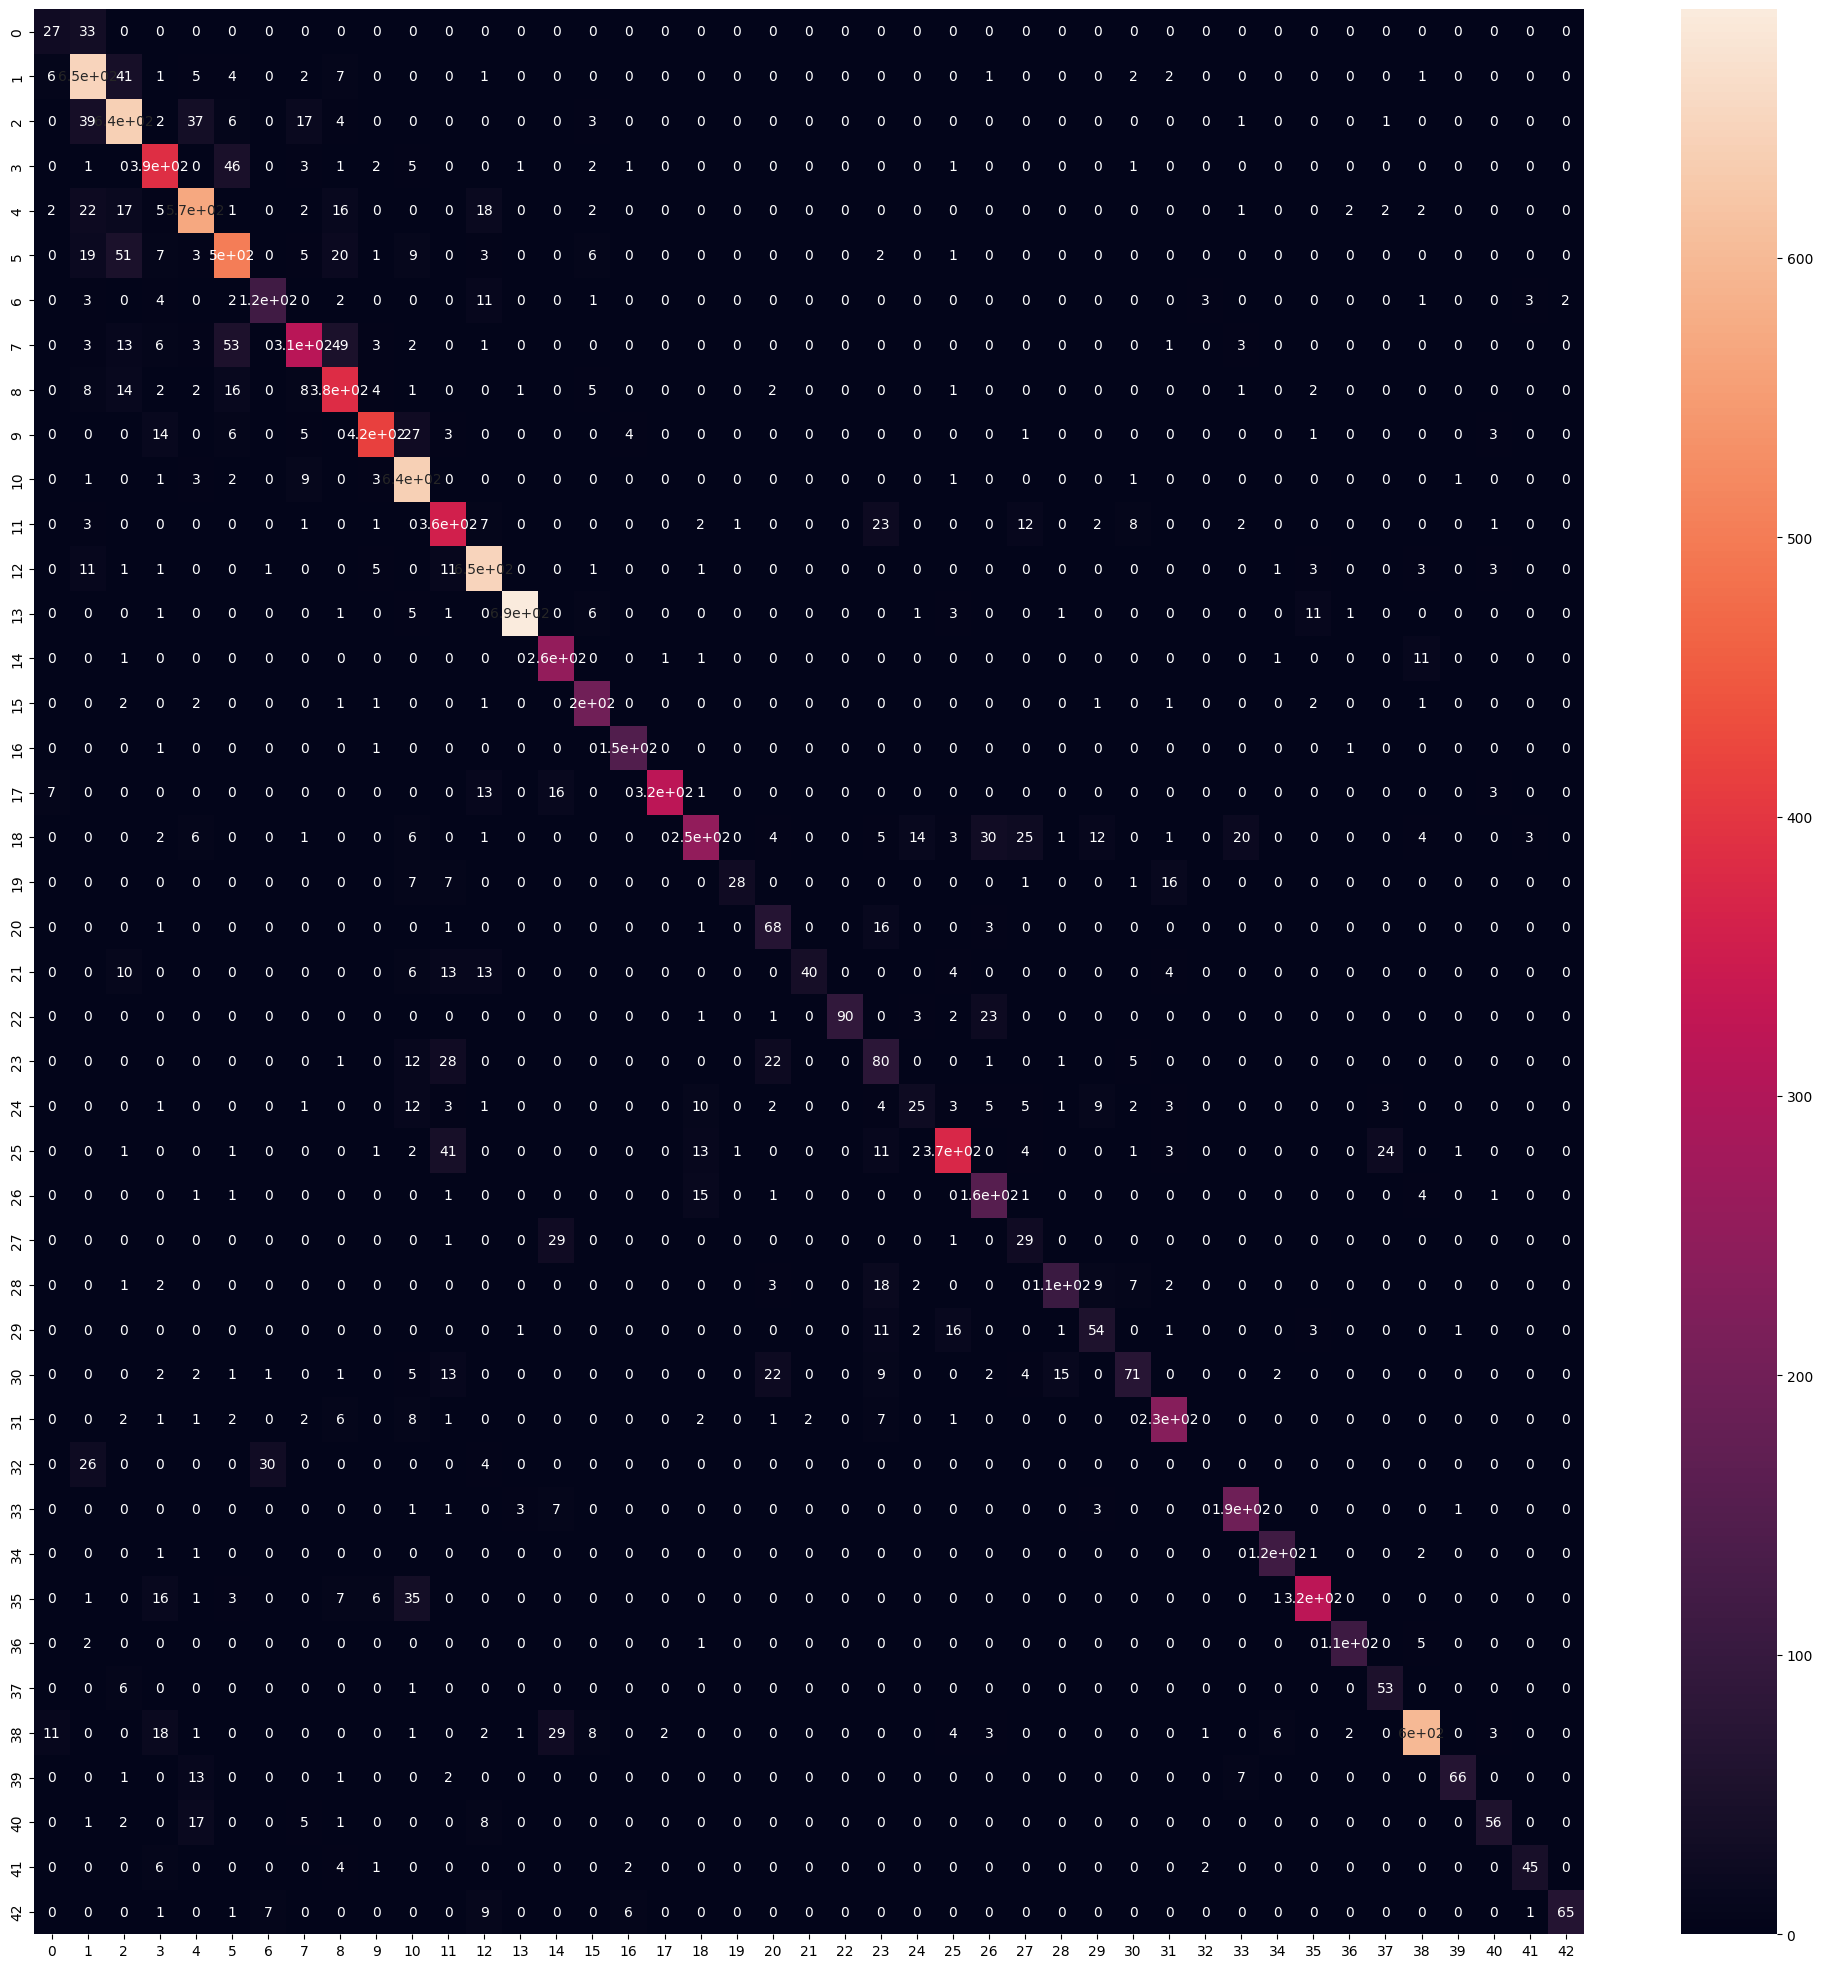

In [10]:
predict_x = cnn_model.predict(x_test_gray_norm)
predicted_classes = np.argmax(predict_x,axis=1)

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize = (25, 25))

sns.heatmap(cm, annot = True)

## Model 2

In [11]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation= 'relu'))

cnn_model.add(Dense(units = 84, activation= 'relu'))

cnn_model.add(Dense(units = 43, activation= 'softmax'))

cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics = ['accuracy'])

history = cnn_model.fit(x_train_gray_norm, y_train, batch_size=500, epochs=30, verbose=1, validation_data=(x_validation_gray_norm, y_validation))

Epoch 1/30
70/70 [==============================] - 10s 121ms/step - loss: 3.0846 - accuracy: 0.1945 - val_loss: 2.5401 - val_accuracy: 0.3320
Epoch 2/30
70/70 [==============================] - 8s 117ms/step - loss: 1.5059 - accuracy: 0.5828 - val_loss: 1.2704 - val_accuracy: 0.6281
Epoch 3/30
70/70 [==============================] - 8s 117ms/step - loss: 0.8058 - accuracy: 0.7697 - val_loss: 0.8991 - val_accuracy: 0.7320
Epoch 4/30
70/70 [==============================] - 8s 116ms/step - loss: 0.5745 - accuracy: 0.8396 - val_loss: 0.7542 - val_accuracy: 0.7812
Epoch 5/30
70/70 [==============================] - 8s 116ms/step - loss: 0.4577 - accuracy: 0.8750 - val_loss: 0.6976 - val_accuracy: 0.8045
Epoch 6/30
70/70 [==============================] - 8s 116ms/step - loss: 0.3769 - accuracy: 0.9029 - val_loss: 0.6414 - val_accuracy: 0.8138
Epoch 7/30
70/70 [==============================] - 8s 117ms/step - loss: 0.3232 - accuracy: 0.9170 - val_loss: 0.6343 - val_accuracy: 0.8186
Epoch

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 135: invalid continuation byte

In [17]:
tf.saved_model.save(cnn_model, '../Models//Modelsv2/')

INFO:tensorflow:Assets written to: ../Models//Modelsv2/assets


INFO:tensorflow:Assets written to: ../Models//Modelsv2/assets


In [15]:
cnn_model.save('../Models/TSignClass3.keras')

import tensorflow as tf

# Load the model
loaded_model = tf.keras.models.load_model('../Models/TSignClass3.keras')

from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Convert the model
full_model = tf.function(lambda x: loaded_model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(loaded_model.inputs[0].shape, loaded_model.inputs[0].dtype))

# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

# Save the frozen graph from the frozen ConcreteFunction to disk
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir="../Models/Modelsv2/",
                  name="../Models/Modelsv2/",
                  as_text=False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 125: invalid continuation byte

# Improving the model

In [ ]:
import base64
from PIL import Image
from io import BytesIO
import cv2

In [ ]:
def array_from_jfif(file):
    with open(file, "rb") as image_file:
        data = base64.b64encode(image_file.read())

    im = Image.open(BytesIO(base64.b64decode(data)))

    img_array = np.asarray(im)

    img_array = np.reshape(img_array, (1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))

    img_array_gray = np.sum(img_array/3, axis = 3, keepdims=True)

    img_array_gray_norm = (img_array_gray - 128) / 128

    # Convert the NumPy array to a PIL Image
    pil_image = Image.fromarray(np.squeeze(img_array_gray_norm))

    # Define the target size
    target_size = (32, 32)

    # Resize the image using Pillow's resize method
    resized_image = pil_image.resize(target_size, Image.ANTIALIAS)

    # Convert the resized PIL Image back to a NumPy array
    resized_image_array = np.expand_dims(np.array(resized_image), axis=-1)

    resized_image_array = resized_image_array.reshape(1, 32, 32, 1)

    return resized_image_array

## Plot all the classes

In [ ]:
fig, axs = plt.subplots(9, 5)

row_index = 0
column_index = 0

for label_index in range(43):

    image_index = np.where(y_train == label_index)[0][0]
    axs[row_index][column_index].imshow(x_train[image_index])

    if column_index == 4: 
        row_index += 1
        column_index = 0
    else:
        column_index += 1        

plt.show()